### Title: Data Science for Good: Kiva Crowdfunding
### Date: Mar. 2nd 2018
### Background:
Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. The mission is to connect people through lending to alleviate proverty. Kiva is in 83 countries, with about 2.7 Million borrowers. Kiva has funded around 1.11 Billion USD worth of loans. It also has around 450 volunteers worldwide.

### Objective:
For the locations in which Kiva has active loans, the objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.


### Approach:
0. Import libraries
1. Load & explore data
2. Make hypothesis
3. placeholder
4. placeholder

### Conclusions:

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set()
sns.set(rc={'figure.figsize':(15,15)})
sns.set_palette(sns.cubehelix_palette(10, start=1.7, reverse=True))
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from ggplot import *
import os

/Users/wandajuan/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

/Users/wandajuan/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

/Users/wandajuan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
os.listdir('input')

['kiva_loans.csv',
 'kiva_locations.csv',
 'kiva_mpi_region_locations.csv',
 'loan_theme_ids.csv',
 'loan_themes_by_region.csv']

In [3]:
loans = pd.read_csv('input/kiva_loans.csv')
locations = pd.read_csv('input/kiva_mpi_region_locations.csv')
theme_ids = pd.read_csv('input/loan_theme_ids.csv')
theme_region = pd.read_csv('input/loan_themes_by_region.csv')

In [4]:
loans.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [5]:
loans.shape, loans.columns.values

((671205, 20),
 array(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
        'country_code', 'country', 'region', 'currency', 'partner_id',
        'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
        'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
        'date'], dtype=object))

The first data set `loans` contains 671205 loan data for each loan transaction. The same borrower may borrow multiple times for different loan_ids.

In [6]:
loans.describe()

id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  657698.000000   
mean   9.932486e+05     785.995061     842.397107     178.199616   
std    1.966113e+05    1130.398941    1198.660073      94.247581   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06  100000.000000  100000.000000     536.000000   

       term_in_months   lender_count  
count   671205.000000  671205.000000  
mean        13.739022      20.590922  
std          8.598919      28.459551  
min          1.000000       0.000000  
25%          8.000000       7.000000  
50%         13.000000      13.000000  
75%         14.000000      24.000000  
max        158.000000    2986.000000

summary of numerical columns shows that
1. id ranges from 653047 ~ 1340339
2. funded_amount/loan_amount ranges from 0/25 to 1000000
3. term in months range from 1 once a month to 158 times per month
4. lender_cn ranges from 0 to 2986 pls

__Note:__ for the first glance, I thought 'partner' means borrower, which is the identity we intend to research on their welfare level. To verify, I group 'partner ID' with 'country', and it turns out some partners are associated with more than one country. Later I realize that 'partner' means __field partner__, instead of borrower. So hold on further analysis.

In [7]:
loans.describe(include=['O'])

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666977       671197   
unique                                             424913           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency                posted_time  \
count        671205  614405   671205                     671205   
unique           87   12695       67                     667399   
top     Philippines  Kaduna      PHP  2017-05-15 00:00:00+00:00   
freq         160441   10000   160440                         25   

                   disbursed_time                funded_time           tags  \
count                      668809                     622874         499789   
unique                       5719                     498007          86719   
top     2017-02-01 08:00:00+00:00  2016-09-21 13:03:24+00:00  user_favorite   
freq                         2800                         33          27088   

       borrower_genders repayment_interval        date  
count            666984             671205      671205  
unique            11298                  4        1298  
top              female            monthly  2017-03-20  
freq             426502             342717        1308

Summary of categorical data:
    1. the top activity is for Farming
    2. out of 671k, there are only 15 unique sectors. The top one is Agriculture
    3. 'use' has very high unique ratio as it is text-heavy -> suitable for text-mining
    4. There are 87 countries but 86 country_codes. there must be a few messy data. 
    5. There are 67 unique currencies, less than #countries -> shared currencies among some countries
    6. *time should be continuous, instead of categorical data
    7. 'tags', similar to use -> suitable for text-mining
    8. borrower_genders -> not intuitive to have 11k unique genders -> dirty data or multiple borrowers can be reason
    9. repayment_interval has only 4 unique values -> looks good and may be good for value_counts

In [8]:
locations.head()

LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210

In [9]:
locations.shape, locations.columns.values

((2772, 9),
 array(['LocationName', 'ISO', 'country', 'region', 'world_region', 'MPI',
        'geo', 'lat', 'lon'], dtype=object))

In [10]:
locations.describe()

MPI         lat         lon
count  984.000000  892.000000  892.000000
mean     0.211330    9.169710   16.635888
std      0.183621   16.484531   61.234566
min      0.000000  -34.947896 -122.747131
25%      0.053000   -1.027901  -12.819854
50%      0.155000   11.211379   26.419389
75%      0.341500   18.084292   47.019436
max      0.744000   49.264748  138.581284

This location dataset is important because it contains MPI (mulitdimensional poverty index) rating for specific regions. We will need to link our borrowers' data to this one to predict on MPI for our borrowers

In [11]:
locations.describe(include=['O'])

LocationName   ISO  country   region        world_region  \
count              984  1008     1008      984                1008   
unique             984   102      102      928                   6   
top     Al-Anbar, Iraq   NGA  Nigeria  Eastern  Sub-Saharan Africa   
freq                 1    37       37        8                 432   

                     geo  
count               2772  
unique               881  
top     (1000.0, 1000.0)  
freq                1880

Summary of `locations` dataset:
    1. the dataset divides the world into 6 world_regions, 102 countirs(ISO/Country Code), and 984 individual locations (apparently some are missing). 
    2. MPI in this dataset ranges from 0 to 0.744 for 984 non-null data

In [12]:
theme_ids.head()

id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0

In [13]:
theme_ids.shape

(779092, 4)

In [14]:
theme_ids.describe()

id     Partner ID
count  7.790920e+05  764279.000000
mean   1.047475e+06     180.825840
std    2.282538e+05      97.914029
min    6.386310e+05       9.000000
25%    8.499768e+05     126.000000
50%    1.046528e+06     145.000000
75%    1.244768e+06     204.000000
max    1.444243e+06     557.000000

In [15]:
mergetb = pd.merge(theme_ids[theme_ids.id< 700000], loans[loans.id <700000], how='outer', left_on='id', right_on='id')


In [16]:
mergetb.shape

(46987, 23)

In [17]:
mergetb.loc[mergetb['Partner ID'] != mergetb['partner_id']]

id    Loan Theme ID          Loan Theme Type  Partner ID  \
0      638631  a1050000000skGl                  General       151.0   
1      640322  a1050000000skGl                  General       151.0   
2      641006  a1050000002X1ij         Higher Education       160.0   
3      641019  a1050000002X1ij         Higher Education       160.0   
4      641594  a1050000002VbsW  Subsistence Agriculture       336.0   
5      642256  a1050000000T3oX          Extreme Poverty       217.0   
6      642311  a1050000000snTK                  General        57.0   
7      642353  a1050000000T3oX          Extreme Poverty       217.0   
8      642386  a1050000000wf0f                  General       133.0   
9      642429  a1050000000wezJ                  General        48.0   
10     642836  a1050000000wf0f                  General       133.0   
11     643267  a1050000000T3oX          Extreme Poverty       217.0   
12     643288  a1050000000wezk                  General        77.0   
13     643402  a1050000000wezk                  General        77.0   
14     643414  a1050000002VkWz              Underserved       334.0   
15     643435  a1050000002VkWz              Underserved       334.0   
16     643447  a1050000000shPp          Extreme Poverty        40.0   
17     643557  a1050000000skGl                  General       151.0   
18     643761  a1050000000wf1a                  General       205.0   
19     644101  a1050000000snTK                  General        57.0   
20     644518  a1050000000wezq                  General        85.0   
21     645222  a1050000000SFvX      Mobile Transactions       219.0   
22     645377  a1050000000wf0J                  General       112.0   
23     645386  a1050000000wf0J                  General       112.0   
24     645758  a1050000000wf19                  General       169.0   
25     645781  a1050000000wezq                  General        85.0   
26     645846  a1050000000wf19                  General       169.0   
27     645918  a1050000000wf19                  General       169.0   
28     645927  a1050000000wf19                  General       169.0   
29     645953  a1050000000wf19                  General       169.0   
...       ...              ...                      ...         ...   
460    653011  a1050000000wbat  Subsistence Agriculture       199.0   
461    653012  a1050000000snT0                  General       182.0   
462    653014  a1050000000wf16                  General       167.0   
463    653015  a1050000000wf16                  General       167.0   
464    653016  a1050000000wbat  Subsistence Agriculture       199.0   
465    653019  a1050000000wf16                  General       167.0   
466    653021  a1050000000wf16                  General       167.0   
467    653022  a1050000000wf16                  General       167.0   
468    653024  a1050000000wf16                  General       167.0   
469    653026  a1050000000wezx                  General        93.0   
470    653027  a1050000000wf16                  General       167.0   
471    653031  a1050000000wf16                  General       167.0   
472    653033  a1050000000wf16                  General       167.0   
473    653034  a1050000000wezx                  General        93.0   
474    653035  a1050000000wezx                  General        93.0   
475    653036  a1050000000wf1U                  General       199.0   
476    653037  a1050000000wf0l                  General       140.0   
477    653038  a1050000000wf0l                  General       140.0   
478    653040  a1050000000wez0                  General        26.0   
479    653041  a1050000000wf0k                  General       139.0   
480    653042  a1050000000sj9s                 Unbanked       139.0   
481    653043  a1050000000wf0w                  General       154.0   
482    653044  a1050000000wf0k                  General       139.0   
483    653045  a1050000000wf0k                  General       139.0   
484    653046  a1050000000sj9s     

`theme_ids` seems not be a good dataset. It does not contain much new and substantial info, and the data size is not consistent with `loans`, which is the master dataset. -> ignore `theme_ids` for now

In [18]:
theme_region.head()

Partner ID          Field Partner Name                       sector  \
0         171             Bai Tushum Bank  General Financial Inclusion   
1         171             Bai Tushum Bank  General Financial Inclusion   
2         171             Bai Tushum Bank  General Financial Inclusion   
3         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   
4         123  Alalay sa Kaunlaran (ASKI)  General Financial Inclusion   

     Loan Theme ID Loan Theme Type      country forkiva  \
0  a1050000002YqaF           Green   Kyrgyzstan      No   
1  a1050000007QIg8     Agriculture   Kyrgyzstan      No   
2  a1050000000wf1B         General   Kyrgyzstan      No   
3  a1050000000wf0V         General  Philippines      No   
4  a1050000000wf0V         General  Philippines      No   

                                              region geocode_old  ISO  number  \
0                            "The first May" village         NaN  KGZ       2   
1                            "The first May" village         NaN  KGZ       1   
2                            "The first May" village         NaN  KGZ       2   
3  #2 Bayabas St. San Gabriel Tuguegarao City,Cag...         NaN  PHL       1   
4           #52C Pagaliluan St. Gosi Sur, Tuguegarao         NaN  PHL       1   

   amount                                       LocationName  \
0    1700                "The first May" village, Kyrgyzstan   
1     300                "The first May" village, Kyrgyzstan   
2    2925                "The first May" village, Kyrgyzstan   
3     500  #2 Bayabas St. San Gabriel Tuguegarao City,Cag...   
4    1000  #52C Pagaliluan St. Gosi Sur, Tuguegarao, Phil...   

                      geocode  \
0  [(42.7338599, 78.3689411)]   
1  [(42.7338599, 78.3689411)]   
2  [(42.7338599, 78.3689411)]   
3                         NaN   
4                         NaN   

                                             names                       geo  \
0  1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan  (42.7338599, 78.3689411)   
1  1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan  (42.7338599, 78.3689411)   
2  1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan  (42.7338599, 78.3689411)   
3                                              NaN          (1000.0, 1000.0)   
4                                              NaN          (1000.0, 1000.0)   

        lat        lon mpi_region mpi_geo  
0  42.73386  78.368941        KGZ     NaN  
1  42.73386  78.368941        KGZ     NaN  
2  42.73386  78.368941        KGZ     NaN  
3       NaN        NaN        PHL     NaN  
4       NaN        NaN        PHL     NaN

In [19]:
theme_region.shape

(15736, 20)

In [20]:
theme_region['Loan Theme ID'].nunique()

718

In [21]:
theme_region['Loan Theme Type'].nunique()

170

In [22]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666977 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [23]:
loans.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [24]:
loans['borrower_genders'].value_counts()[0:10]

female                                                                            426502
male                                                                              134710
female, female                                                                     12164
female, female, female                                                             11676
female, female, female, female                                                      9052
female, female, female, female, female                                              7568
female, female, female, female, female, female                                      2674
female, female, female, female, female, female, female, female, female, female      2185
female, female, female, female, female, female, female                              2127
female, female, female, female, female, female, female, female                      1936
Name: borrower_genders, dtype: int64

'borrower_genders' does not come with the form that we are expecting clarity and simplicity. So here I am making a function to simplify borrowers into ['Majority Female', 'Majority Male', 'Equal M and F']

In [25]:
loans[loans.borrower_genders.isnull()].borrower_genders

140       NaN
145       NaN
170       NaN
412       NaN
414       NaN
464       NaN
466       NaN
546       NaN
595       NaN
616       NaN
634       NaN
695       NaN
797       NaN
909       NaN
1080      NaN
1110      NaN
1206      NaN
1209      NaN
1223      NaN
1337      NaN
1345      NaN
1449      NaN
1510      NaN
1515      NaN
1596      NaN
1618      NaN
1675      NaN
1706      NaN
1711      NaN
1829      NaN
         ... 
629112    NaN
629462    NaN
629647    NaN
632131    NaN
632466    NaN
633352    NaN
633506    NaN
635237    NaN
635806    NaN
636208    NaN
639085    NaN
640245    NaN
642696    NaN
643472    NaN
646452    NaN
646748    NaN
647086    NaN
647114    NaN
647505    NaN
648019    NaN
658799    NaN
659387    NaN
659604    NaN
660788    NaN
661718    NaN
671151    NaN
671174    NaN
671178    NaN
671185    NaN
671202    NaN
Name: borrower_genders, Length: 4221, dtype: object

In [26]:
def process_gender(x):
    if type(x) is float and np.isnan(x):
        return 'nan'
    genders = x.split(",")
    Male_count = [sum(g.strip()=='male' for g in genders)]
    Female_count = [sum(g.strip() == 'female' for g in genders)]
    if Female_count > Male_count:
        return "Majority Female"
    elif Female_count < Male_count:
        return "Majority Male"
    else:
        return "Equal M & F"

In [27]:
loans['borrower_genders'] = loans['borrower_genders'].apply(process_gender)

In [28]:
loans['borrower_genders'].tail()

671200    Majority Female
671201    Majority Female
671202                nan
671203    Majority Female
671204    Majority Female
Name: borrower_genders, dtype: object

In [29]:
loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

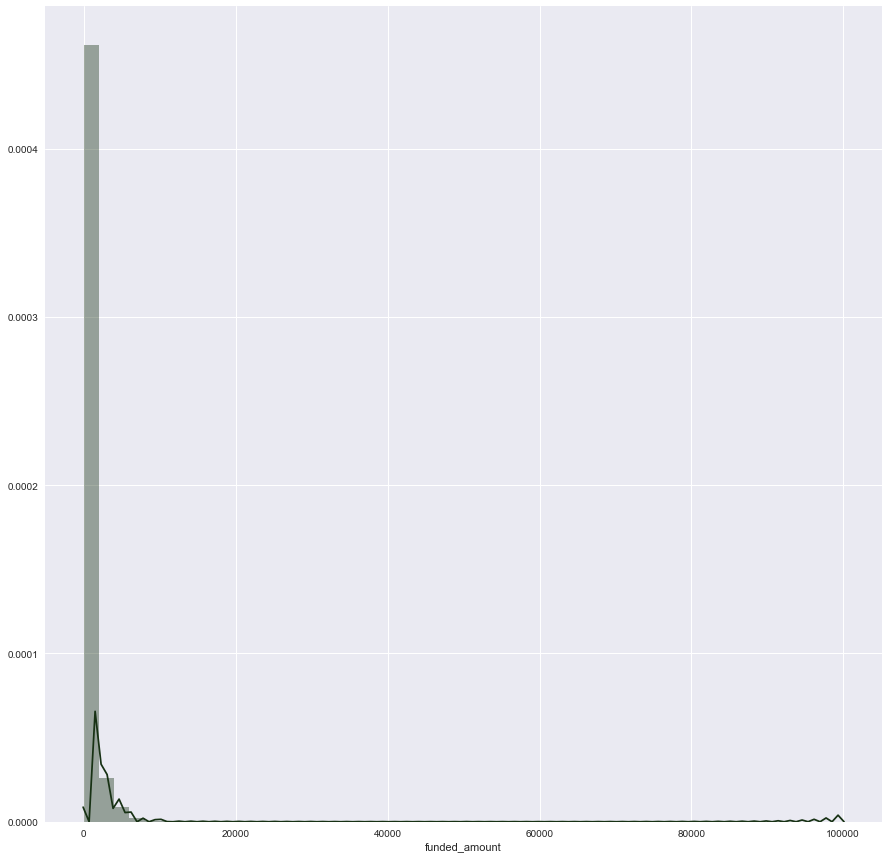

In [30]:
sns.distplot(loans['funded_amount'])

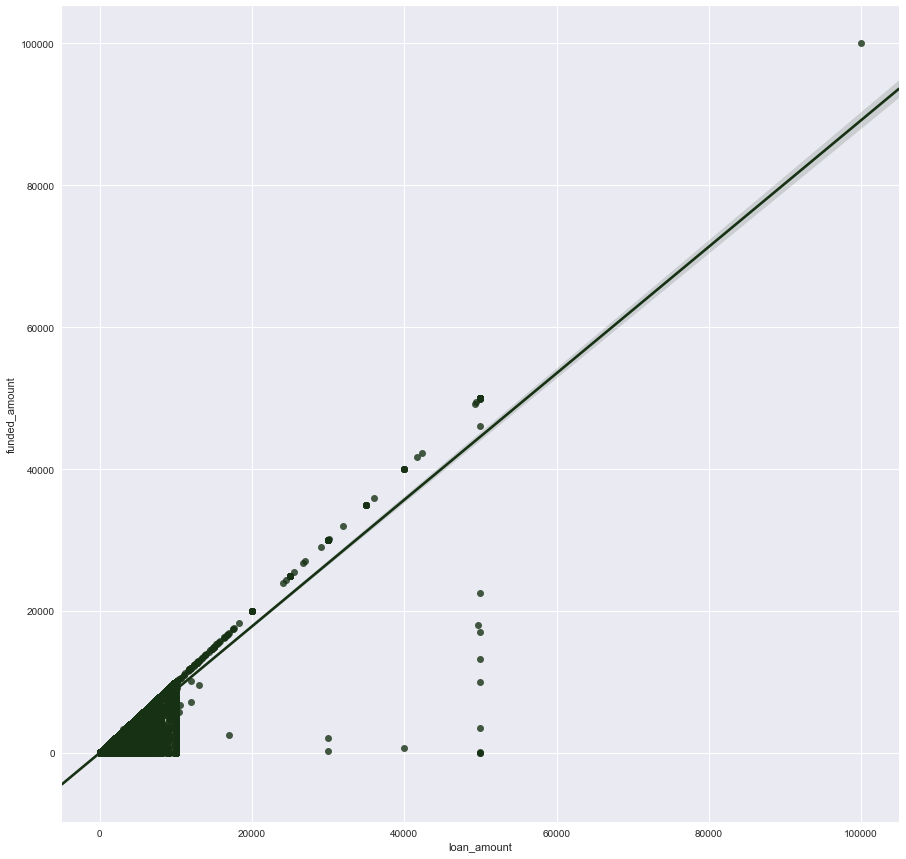

In [31]:
sns.regplot(x='loan_amount', y='funded_amount', data=loans)

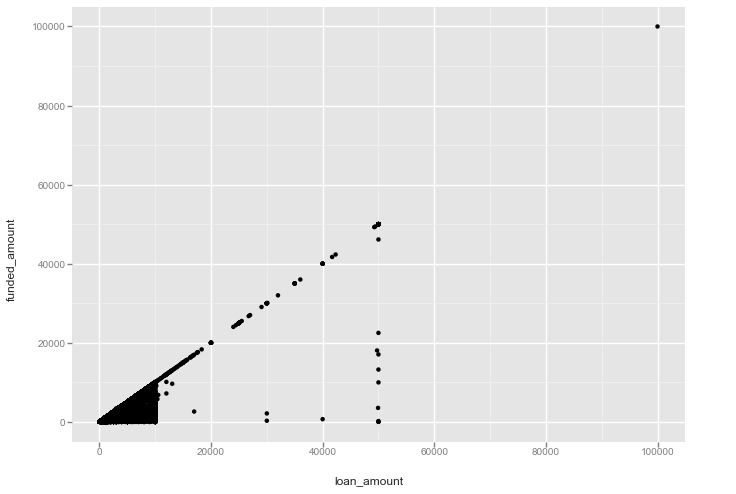

<ggplot: (-9223372036566056188)>

In [32]:
ggplot(loans, aes(x='loan_amount', y='funded_amount'))+geom_point()

The only continuous numeric data in the `loans` dataset are `funded_amount` and `loan_amount`. To get a feel of their relationship, the scatterplot above shows that the majority of funding requests are approved with the funded amount (__fall onto the diagonal line__), but the rest are on the __buttomright of the plane__, which means for these requests, the funded amount is less than loan amount. But interestingly, __the highest amount request of 100k gets approved__ for the full amount. __loan_amount = 50k or <=10k seem to have lower approval rate__.

### Top activity counts: Farming, General Store, Personal Housing Expenses, Food Production/Sales, Agriculture

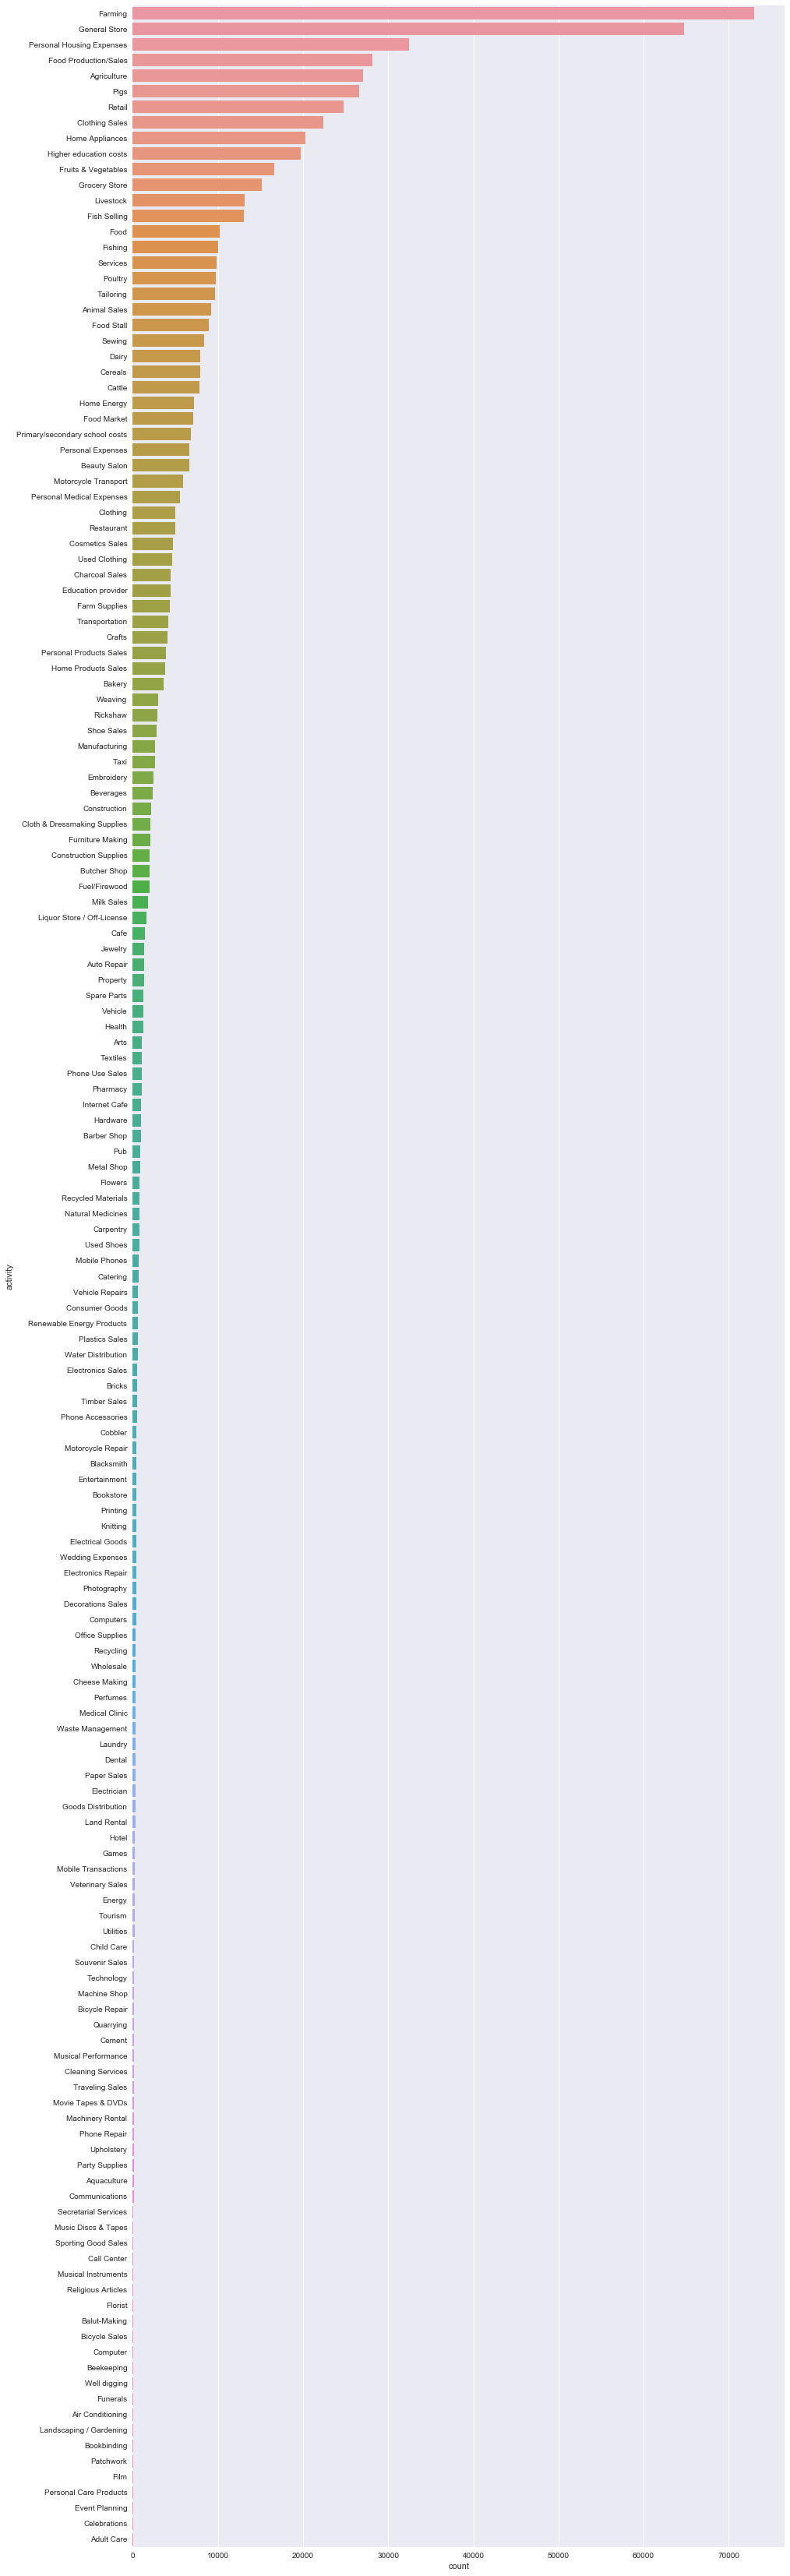

In [33]:
sns.set(rc={'figure.figsize':(15,60)})
sns.countplot(y='activity', data=loans, order=loans['activity'].value_counts().index)

### Top activity average funded amount: 
1. Landscaping/Gardening: 3640, 2: Renewable Energy Products: 3074, 3. Technology: 2406

In [34]:
loans_gb_activity = loans.groupby(by='activity')
activity_rank = pd.DataFrame(loans_gb_activity.funded_amount.mean().sort_values(ascending=False).reset_index())

In [35]:
activity_rank.columns = ['activity', 'avg_funded_amount']
activity_rank[0:10]

activity  avg_funded_amount
0    Landscaping / Gardening        3640.147059
1  Renewable Energy Products        3074.658120
2                 Technology        2405.870787
3             Communications        2325.885417
4                 Child Care        2280.327869
5          Cleaning Services        2228.172414
6                       Film        2092.307692
7                 Used Shoes        1851.595745
8                    Florist        1829.615385
9                   Perfumes        1700.381098

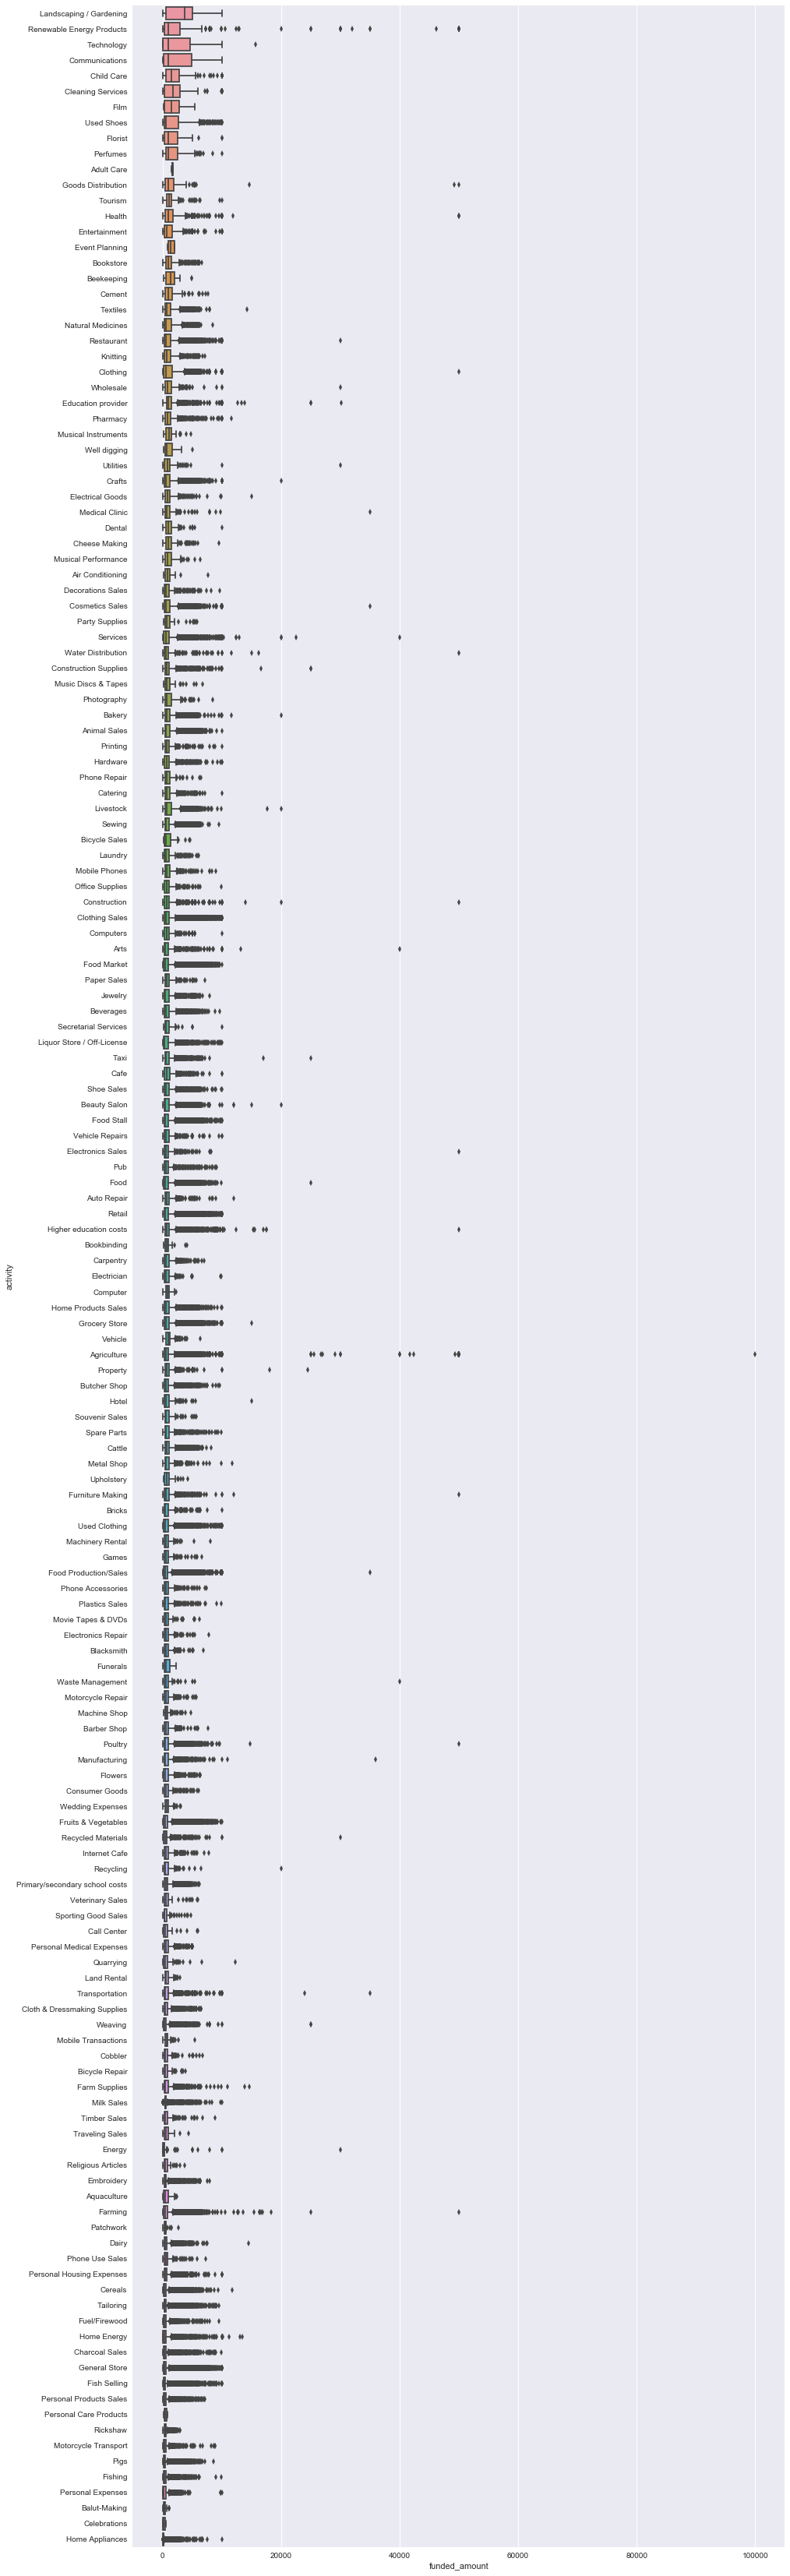

In [36]:
sns.set(rc={'figure.figsize':(15, 60)})
sns.boxplot(x='funded_amount', y='activity', data=loans, order=activity_rank['activity'])

For better visualization, we filter out __only loans with funded_amount <= 20k.__

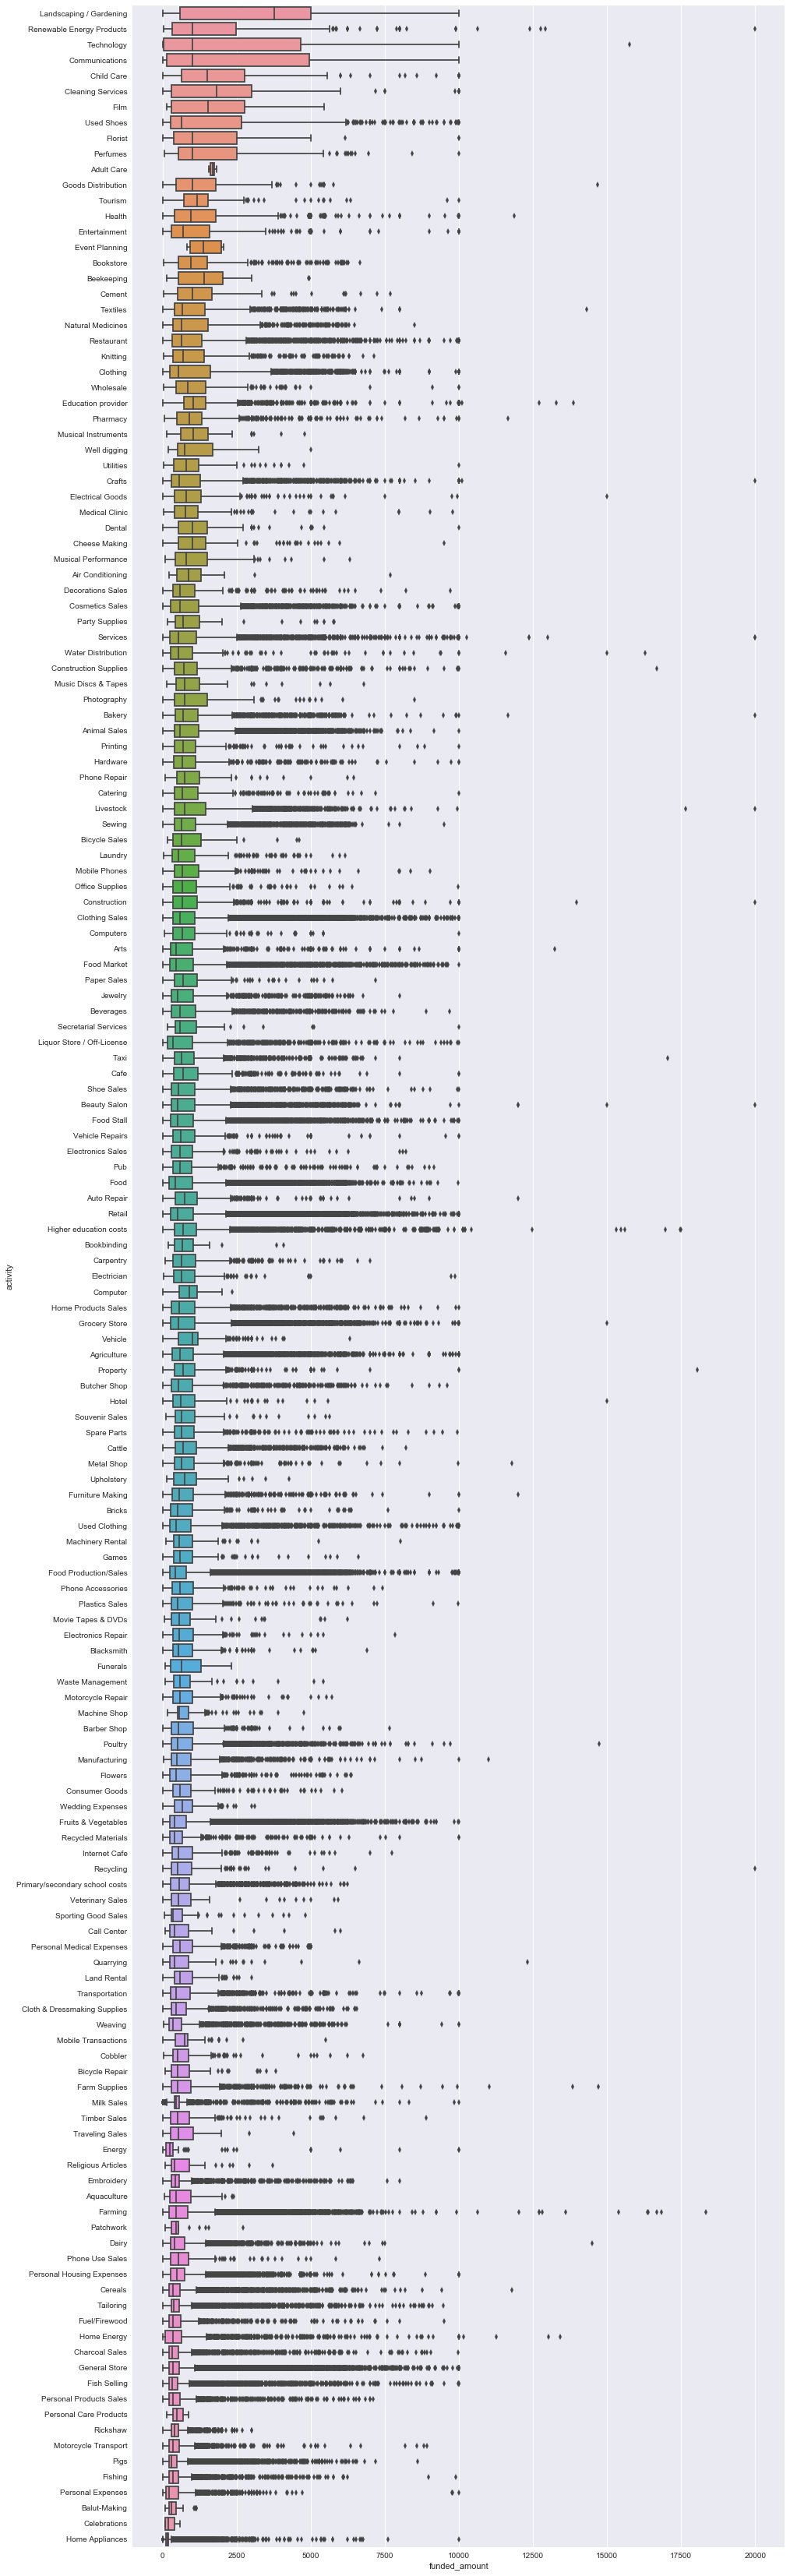

In [37]:
sns.set(rc={'figure.figsize':(15, 60)})
sns.boxplot(x='funded_amount', y='activity', data=loans[loans.funded_amount<=20000], order=activity_rank['activity'])

### Top sector counts: Agriculture, Food, Retail, Services, Personal Use

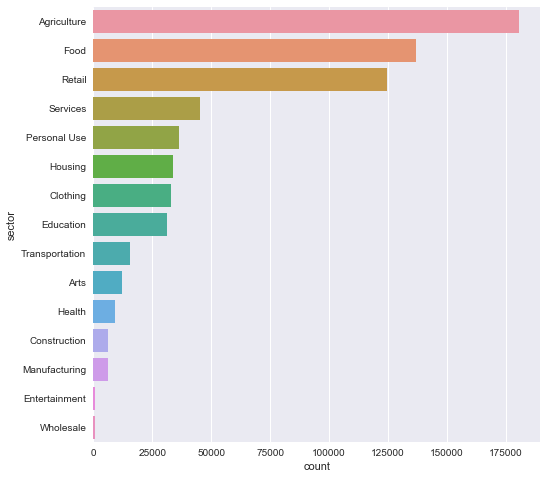

In [38]:
sns.set(rc={'figure.figsize':(8, 8)})
sns.countplot(y='sector', data=loans, order=loans['sector'].value_counts().index)

### Top sectors with highest average funded amount: 
1. Wholesale:1449, 2. Entertainment: 1232, 3. Clothing: 1063, 4. Construction: 1008, 5. Health: 994

In [39]:
loans_gb_sector = loans.groupby(by='sector')
sector_rank = pd.DataFrame(loans_gb_sector.funded_amount.mean().sort_values(ascending=False).reset_index())

In [40]:
sector_rank.columns=['sector', 'avg_funded_amount']

In [41]:
sector_rank

sector  avg_funded_amount
0        Wholesale        1449.369085
1    Entertainment        1232.644578
2         Clothing        1063.016004
3     Construction        1008.537811
4           Health         994.497452
5             Arts         980.186982
6        Education         968.784703
7         Services         951.840607
8    Manufacturing         862.862436
9             Food         842.175739
10     Agriculture         741.925408
11          Retail         729.873367
12  Transportation         634.263436
13         Housing         633.752335
14    Personal Use         389.989694

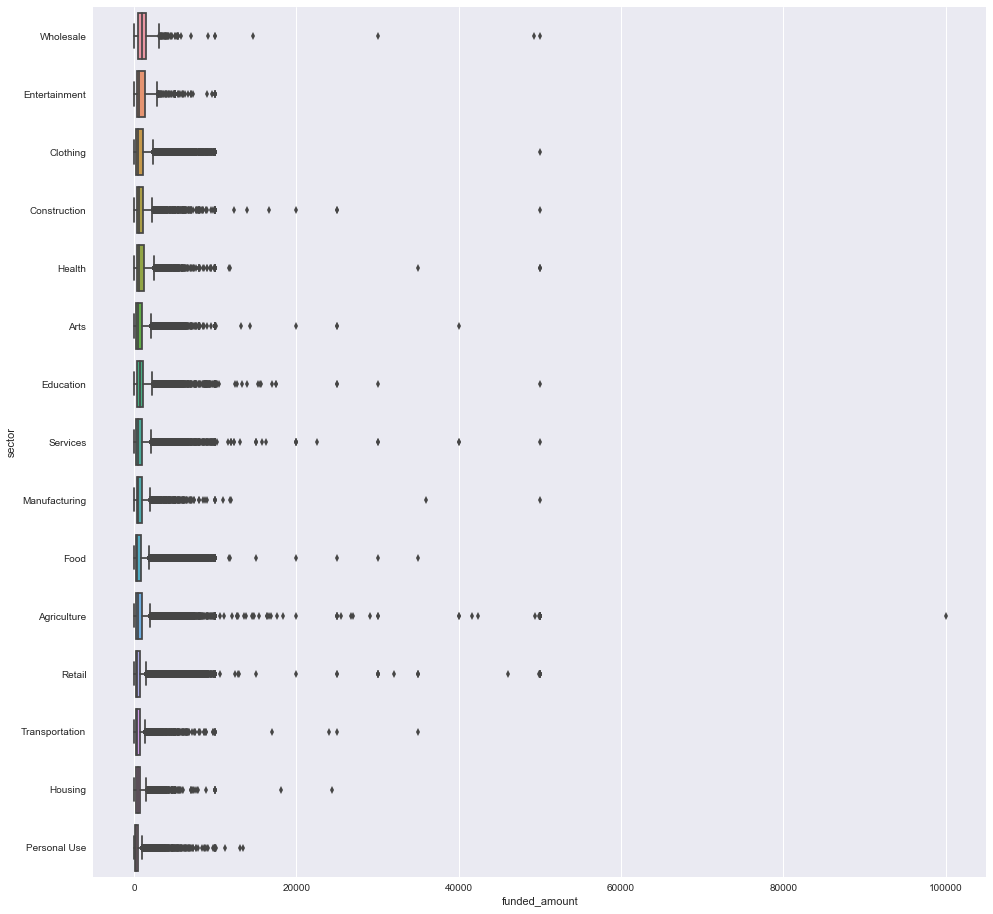

In [42]:
sns.set(rc={'figure.figsize': (16, 16)})
sns.boxplot(x='funded_amount', y='sector', data=loans, order=sector_rank['sector'])

Similarly, to better observe boxes in the boxplot, we filter out __loans with funded_amount<2000__.

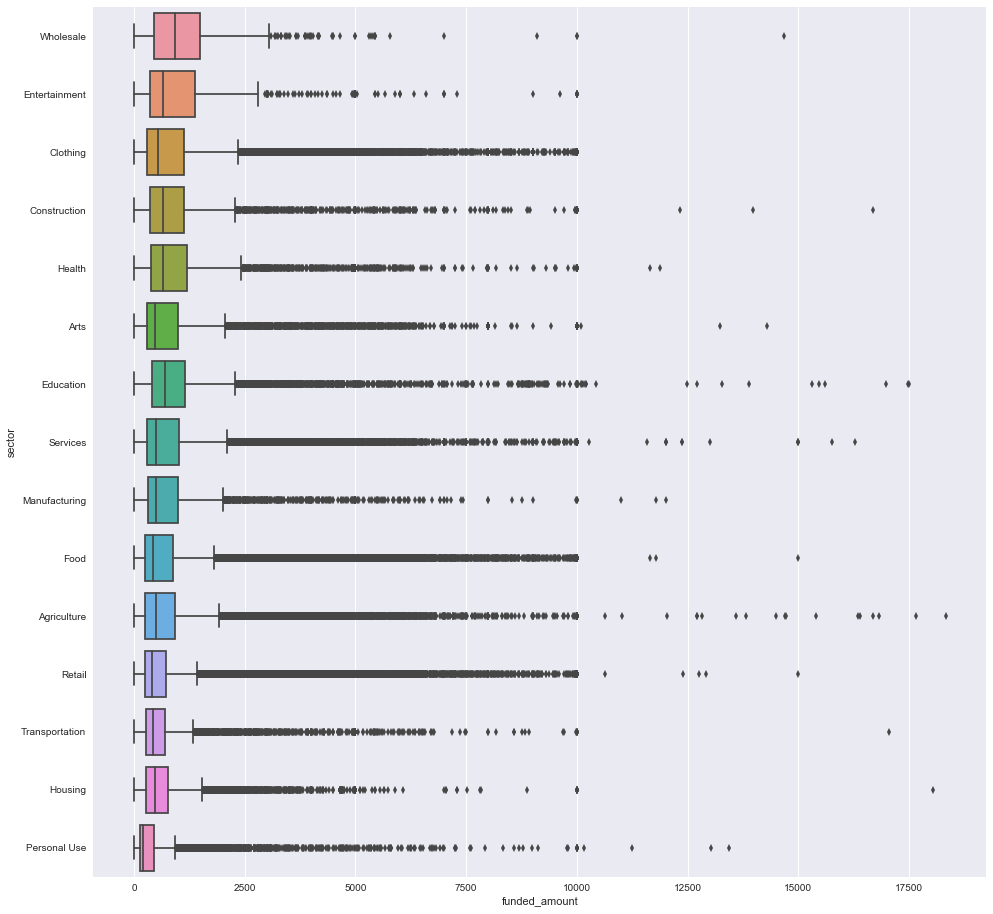

In [43]:
sns.boxplot(x='funded_amount', y='sector', data=loans[loans.funded_amount<20000], order=sector_rank['sector'])

Wondering, what exactly differences between `activity` and `sector`? It seems that there are 160+ unique activity and 15 unique sectors. Intuition tells us that activity can be a subclass of sector.
So below, I am going to measure the relationship, and further plot quantitative charts as per sector, activity

In [44]:
loans_gb_sector_activity = loans.groupby(by=['sector', 'activity'])
loans_gb_sector_activity['funded_amount'].mean()

sector          activity               
Agriculture     Agriculture                 944.777967
                Animal Sales               1079.950200
                Aquaculture                 660.185185
                Beekeeping                 1423.000000
                Cattle                      924.752066
                Dairy                       630.468158
                Farm Supplies               724.770221
                Farming                     656.575971
                Flowers                     804.171742
                Land Rental                 769.314079
                Livestock                  1046.145475
                Pigs                        455.603027
                Poultry                     812.399060
                Veterinary Sales            779.166667
Arts            Arts                       1008.150183
                Crafts                     1182.653036
                Embroidery                  665.945378
                Film     

In [45]:
loans_gb_sector['activity'].unique(), loans_gb_sector['activity'].unique().apply(len)

(sector
 Agriculture       [Dairy, Poultry, Farming, Pigs, Agriculture, C...
 Arts              [Embroidery, Arts, Crafts, Knitting, Weaving, ...
 Clothing          [Clothing Sales, Used Clothing, Clothing, Used...
 Construction      [Construction Supplies, Construction, Timber S...
 Education         [Education provider, Higher education costs, P...
 Entertainment           [Entertainment, Games, Musical Performance]
 Food              [Fruits & Vegetables, Milk Sales, Food Product...
 Health            [Natural Medicines, Pharmacy, Medical Clinic, ...
 Housing                       [Personal Housing Expenses, Property]
 Manufacturing     [Manufacturing, Blacksmith, Metal Shop, Furnit...
 Personal Use      [Personal Expenses, Vehicle, Home Energy, Home...
 Retail            [General Store, Personal Products Sales, Home ...
 Services          [Services, Beauty Salon, Tailoring, Sewing, Ma...
 Transportation    [Rickshaw, Transportation, Motorcycle Transpor...
 Wholesale                

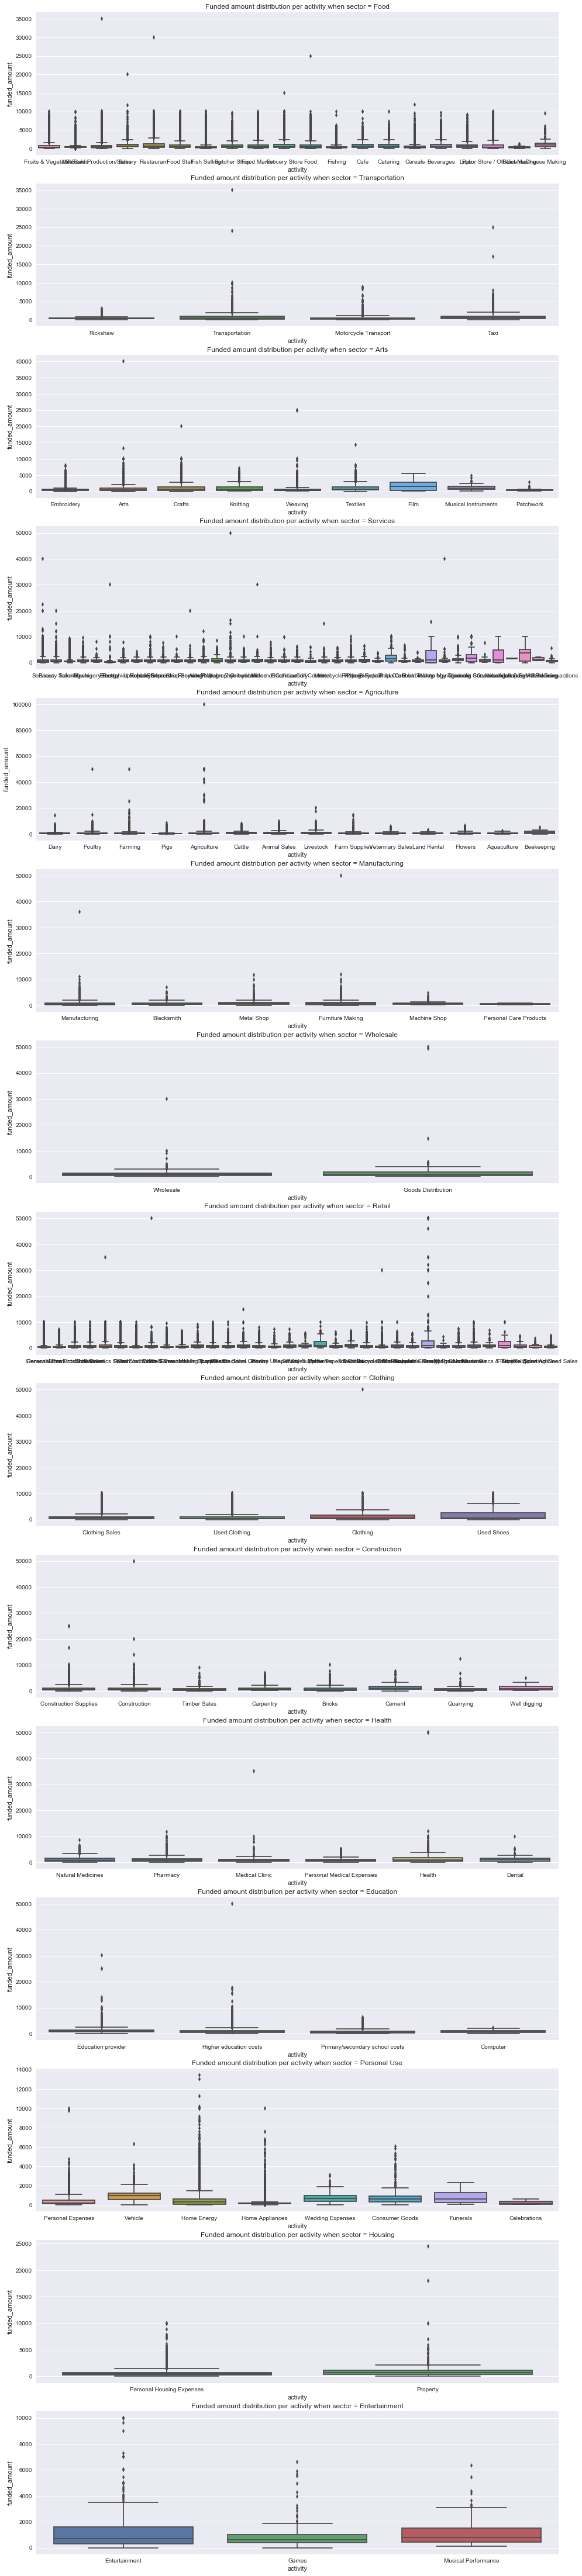

In [46]:
sns.set(rc={'figure.figsize':(16, 80)})
fig, axs = plt.subplots(nrows=loans['sector'].nunique())
for i in range(loans['sector'].nunique()):
    sns.boxplot(x='activity', y='funded_amount', data=loans[loans.sector==loans['sector'].unique()[i]], ax=axs[i]).set_title('Funded amount distribution per activity when sector = '+loans['sector'].unique()[i])

Each of the 15 boxplots is a good visualization showing what are the breakdown activities as per each sector. Although some sectors have more than 15 activities, the plot becomes displeasant. We can still get the idea and able to dig in further when needed. 

### Top country counts: Philippines, Kenya, El Salvador, Cambodia, Pakistan

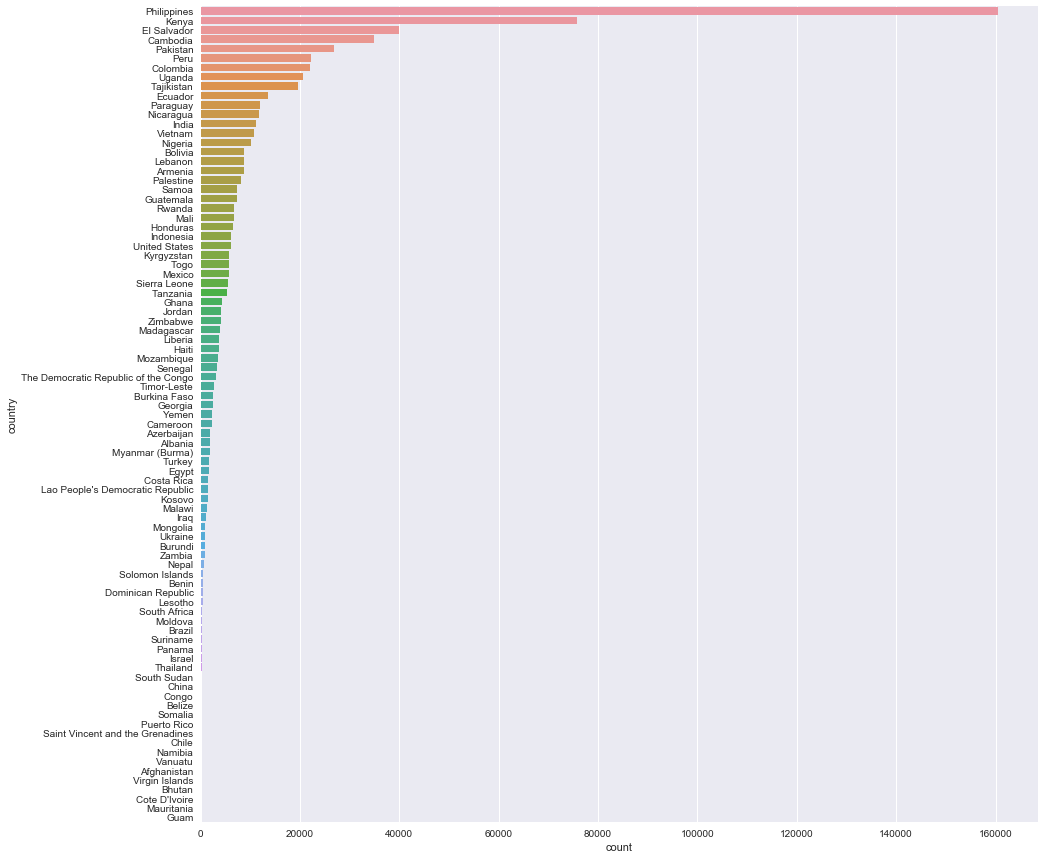

In [47]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(y='country', data=loans, order=loans['country'].value_counts().index)

### Countries with highest funded_amount:

In [48]:
loans_gb_country = loans.groupby(by='country')
avg_funded_amount_per_country = pd.DataFrame(loans_gb_country.funded_amount.mean().sort_values(ascending=False).reset_index())
avg_funded_amount_per_country.columns=['country', 'avg_funded_amount']

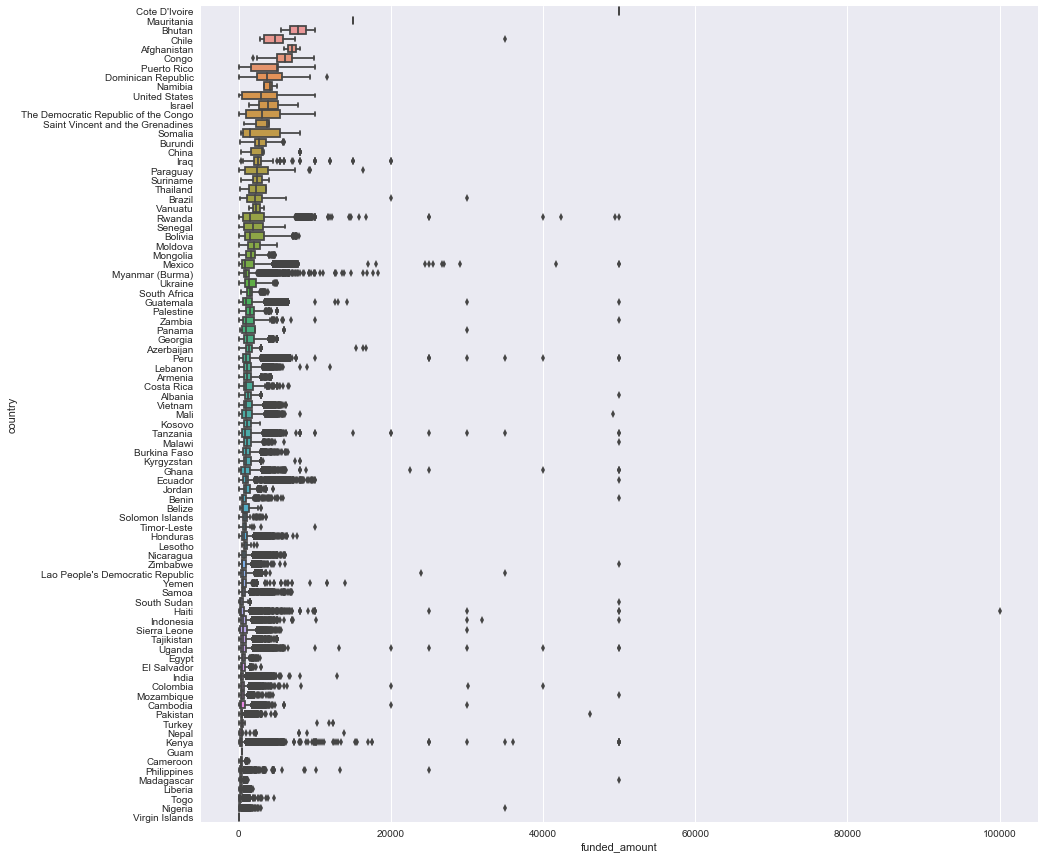

In [49]:
sns.boxplot(x='funded_amount', y='country', data=loans, order=avg_funded_amount_per_country['country'])

In [50]:
loans['country'].nunique(), loans['region'].nunique()

(87, 12695)

In [51]:
loans_gb_country.region.unique(), loans_gb_country.region.unique().apply(len).sum()

(country
 Afghanistan                                                               [Kandahar City]
 Albania                                 [Korce, Elbasan, nan, Lezhe, Lac, Librazhd, Ce...
 Armenia                                 [Armavir, Goris, Gyumri, Mayisyan village, Arm...
 Azerbaijan                              [Agdas, Agsu, nan, Sabirabad, Fuzuli region, B...
 Belize                                  [San Jose, nan, Pueblo Viejo, Na' Luum Ca', Sa...
 Benin                                                          [nan, Porto-Novo, Parakou]
 Bhutan                                                                     [nan, Thimphu]
 Bolivia                                 [La Paz, Cochabamba, La Paz  / El Alto, La Paz...
 Brazil                                  [Sorocaba, Rio de Janeiro, nan, Perdizes, São ...
 Burkina Faso                            [MOGTEDO, SIGNOGHIN, Ouagadougou, BOGODOGO, Go...
 Burundi                                 [Bujumbura, Gitega, nan, Bubanza, Rumong

From the above analysis, we can see that for 87 countries that Kiva has operations, there are in total 12821 regions. It won't be efficient to analyze each region nor country. Instead, it might be more effective to example all these locations togethor on a map. I am looking to incorporate geocode to create map plots.

I took the dataset that Mitchell Reynolds published in https://www.kaggle.com/mithrillion/kiva-challenge-coordinates to match on 'country' and 'region' to get geolocations.

In [52]:
#geo_locations = pd.read_csv('input/kiva_locations.csv')
geo_locations  = pd.read_csv('input/kiva_locations.csv', sep='\t', error_bad_lines=False)

In [53]:
geo_locations.head()

region    country       lat         lng
0               Bandung Kota  Indonesia -6.917464  107.619123
1            Bandung Selatan  Indonesia -6.955757  107.630410
2              Bandung Timur  Indonesia -6.917464  107.619123
3                     Bantul  Indonesia -7.874818  110.325536
4  Baturiti - Tabanan - Bali  Indonesia -8.339788  115.177059

In [79]:
geo_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12821 entries, 0 to 12820
Data columns (total 4 columns):
region     12749 non-null object
country    12821 non-null object
lat        12821 non-null float64
lng        12821 non-null float64
dtypes: float64(2), object(2)
memory usage: 400.7+ KB


In [83]:
geo_locations.groupby(['country']).region.unique().apply(len).sum()

12821

In [86]:
loans = loans.merge(geo_locations, how='left', on=['country', 'region'])

In [92]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
LocationName    984 non-null object
ISO             1008 non-null object
country         1008 non-null object
region          984 non-null object
world_region    1008 non-null object
MPI             984 non-null float64
geo             2772 non-null object
lat             892 non-null float64
lon             892 non-null float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [94]:
MPI_loc = pd.merge(locations, geo_locations, how='inner', on=['country', 'region'])

In [95]:
MPI_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 11 columns):
LocationName    110 non-null object
ISO             117 non-null object
country         117 non-null object
region          110 non-null object
world_region    117 non-null object
MPI             110 non-null float64
geo             117 non-null object
lat_x           108 non-null float64
lon             108 non-null float64
lat_y           117 non-null float64
lng             117 non-null float64
dtypes: float64(5), object(6)
memory usage: 11.0+ KB


In [103]:
MPI_loc = MPI_loc[MPI_loc.MPI.notnull()]
MPI_loc = MPI_loc.drop(['lat_x', 'lon'], axis=1)

In [105]:
MPI_loc['lat'] = MPI_loc['lat_y']
MPI_loc = MPI_loc.drop(['lat_y'], axis=1)

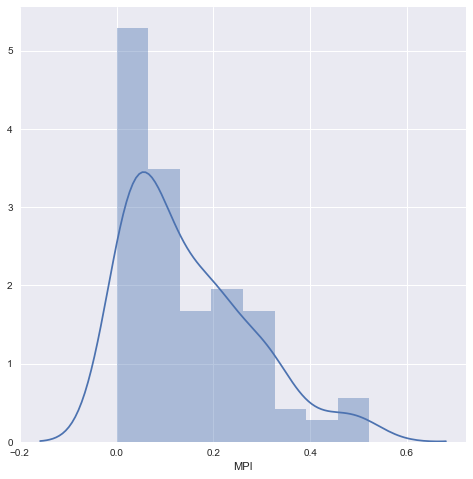

In [108]:
sns.set(rc={'figure.figsize':(8,8)})
sns.distplot(MPI_loc['MPI'])

In [78]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [132]:
scl = [[1, "rgb(255, 0, 0)"], [0.6, "rgb(0, 255,0)"]]
#[ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
#    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [dict (
    type='scattergeo',
    lon = MPI_loc['lng'] , lat = MPI_loc['lat'] ,
    #marker=['red', 'blue'],
    text = MPI_loc['country'] +', '+MPI_loc['region'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.5,
        reversescale = True,
        autocolorscale = False,
        #symbol = 'square',
        colorscale=scl,
        cmin = 0,
        color = MPI_loc['MPI'],
        cmax = MPI_loc['MPI'].max(),
        colorbar = dict(
            title="MPI colorscale")))]

layout = dict(
    title = 'MPI',
    geo = dict(
        scope='world',
        showland=True,
        landcolor = "rgb(225, 225, 225)",
        subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5)
    )

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

Above map plot shows 110 locations where we have MPI data, and the color indicates MPI level. The reder the poorer the location is.

In [137]:
data = [dict (
    type='scattergeo',
    lon = geo_locations['lng'] , lat = geo_locations['lat'] ,
    #marker=['red', 'blue'],
    text = geo_locations['country'] +', '+geo_locations['region'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.5,
        reversescale = True,
        autocolorscale = False,
        #symbol = 'square',
        #colorscale=scl,
        #cmin = 0,
        color = 'green'
        #cmax = MPI_loc['MPI'].max(),
        #colorbar = dict(
        #    title="MPI colorscale")
        ))]
layout = dict(
    title = 'Kiva borrower locations',
    geo = dict(
        scope='world',
        showland=True,
        landcolor = "rgb(225, 225, 225)"
        )
    )


In [138]:
fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

Much more than 110, the locations where Kiva's borrowers in are more than 12k. We certainly need to collect more data to represent these locations' welfare level.